# experiment of basic Machine Learning tools (Regression In Server)
**/BiO/Preterm/krishna_test/jupyter_file/machine_learning_projects**


<font color=green>
1. [Overview](#1) <br>
1. [Importing Libraries and Reading the Dataset](#2)<br>
1. [Data Analysis](#3) <br>
    * [Data Preprocessing](#4) <br>
    * [Visualizing Data](#5) <br>
1. [Regression Models](#6) <br>
    * [Linear Regression](#7) <br>
    * [Polynomial Regression - 2nd degree](#8)<br>
    * [Ridge Regression](#9) <br>
    * [Lasso Regression](#10)<br>
    * [Support Vector Regression](#11)<br>
    * [Decision Tree Regression](#12) <br>
    * [Random Forest Regression](#13)<br>
1. [Measuring the Error](#14)<br>
    * [Visualizing Models Performance](#15)<br>
1. [Conclusion](#16)
<hr/>

In [1]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


## <span id="1"></span> ** 1. Overview **

Columns:
- **CRIM:** Per capita **crime rate** by town
- **ZN:** Proportion of **residential land zoned** for lots over 25,000 sq. ft
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS :** **Charles River** dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX:** **Nitric oxide** concentration (parts per 10 million)
- **RM:** Average number of **rooms* per dwelling
- **AGE:** Proportion of **owner-occupied** units built prior to 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to **radial highways**
- **PTRATIO:** **Pupil-teacher** ratio by town
- **B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT:** Percentage of **lower status of the population**
- **MEDV:** Median value of owner-occupied homes in $1000s

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [6]:
import numpy as np   # Algebra Operation
import pandas as pd  #Table , Excel ,CSV
import matplotlib.pyplot as plt  #To display figure in pandas
import matplotlib as mpl
import seaborn as sns   #Also to display figure

from sklearn.metrics import mean_squared_error     #sklearn to find mean_square_error
from sklearn.model_selection import cross_val_score #To check the  Cross_Value Score value 
import sys
from collections import Counter   #Counts and store in dictionary forms
import sklearn
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [3]:
#We are using these version now
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.1.1
sklearn: 0.21.2
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.17.4
Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [7]:
# A few tiny adjustments for better code readability
sns.set(style = "white" , context = "notebook",palette = "deep")
mpl.style.use("ggplot")
sns.set_style("white")
%matplotlib inline

### Loading the data 

In [8]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
#boston_dataset
#type(boston_dataset)
#Convert this data in to Pandas Data Frame so calculation is easy
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [10]:
# display first 5 Columns 
dataset.head()
#dataset.tail()
#dataset.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


 there isn't **"MEDV"** column that we will try to predict. Let's add the column to our dataset. Col 주가 한다

In [11]:
dataset['MEDV'] = boston_dataset.target

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
dataset.shape

(506, 14)

## <span id="3"></span> ** 3. Data Analysis **

### <span id="4"></span> ** Data Preprocessing **

 ## NAN 데이터 있는지 / 없는지 학인 한다

In [14]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##  회귀 분석 하기 위해서 Y 과 X 데이터 준비 한다

In [113]:
#len(dataset.iloc[:,13].values)#.reshape(1,-1)
#len(dataset.iloc[:,13].values.reshape(1,-1))
#dataset.iloc[:5,13]

In [18]:
x = dataset.iloc[:, 0:13].values
y = dataset.iloc[:,13].values.reshape(-1,1)  
# x and y Column selection

### Training 데이터 및 Testing Data  

In [19]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 25)

In [20]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape #데이터 학인 한다

((253, 13), (253, 13), (253, 1), (253, 1))

In [21]:
x_train[1],y_train[1]

(array([ 22.5971,   0.    ,  18.1   ,   0.    ,   0.7   ,   5.    ,
         89.5   ,   1.5184,  24.    , 666.    ,  20.2   , 396.9   ,
         31.99  ]), array([7.4]))

In [22]:
x_test[1],y_test[1]

(array([5.69175e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.83000e-01,
        6.11400e+00, 7.98000e+01, 3.54590e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.92680e+02, 1.49800e+01]), array([19.1]))

### <span id="5"></span> ** Visualizing Data  데이터 시각화** 

### Correlation with Heat Map

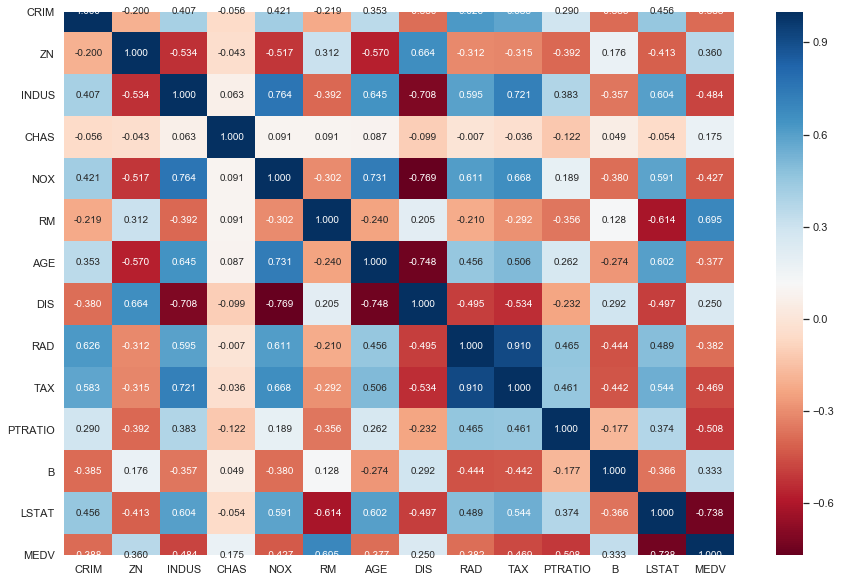

In [23]:
corr = dataset.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(15, 10))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot= True, fmt=".3f")  #fmt is for decimal point ,annot False is for no label,

#Apply xticks
#plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
#plt.yticks(range(len(corr.columns)), corr.columns)
#show plot

plt.show()

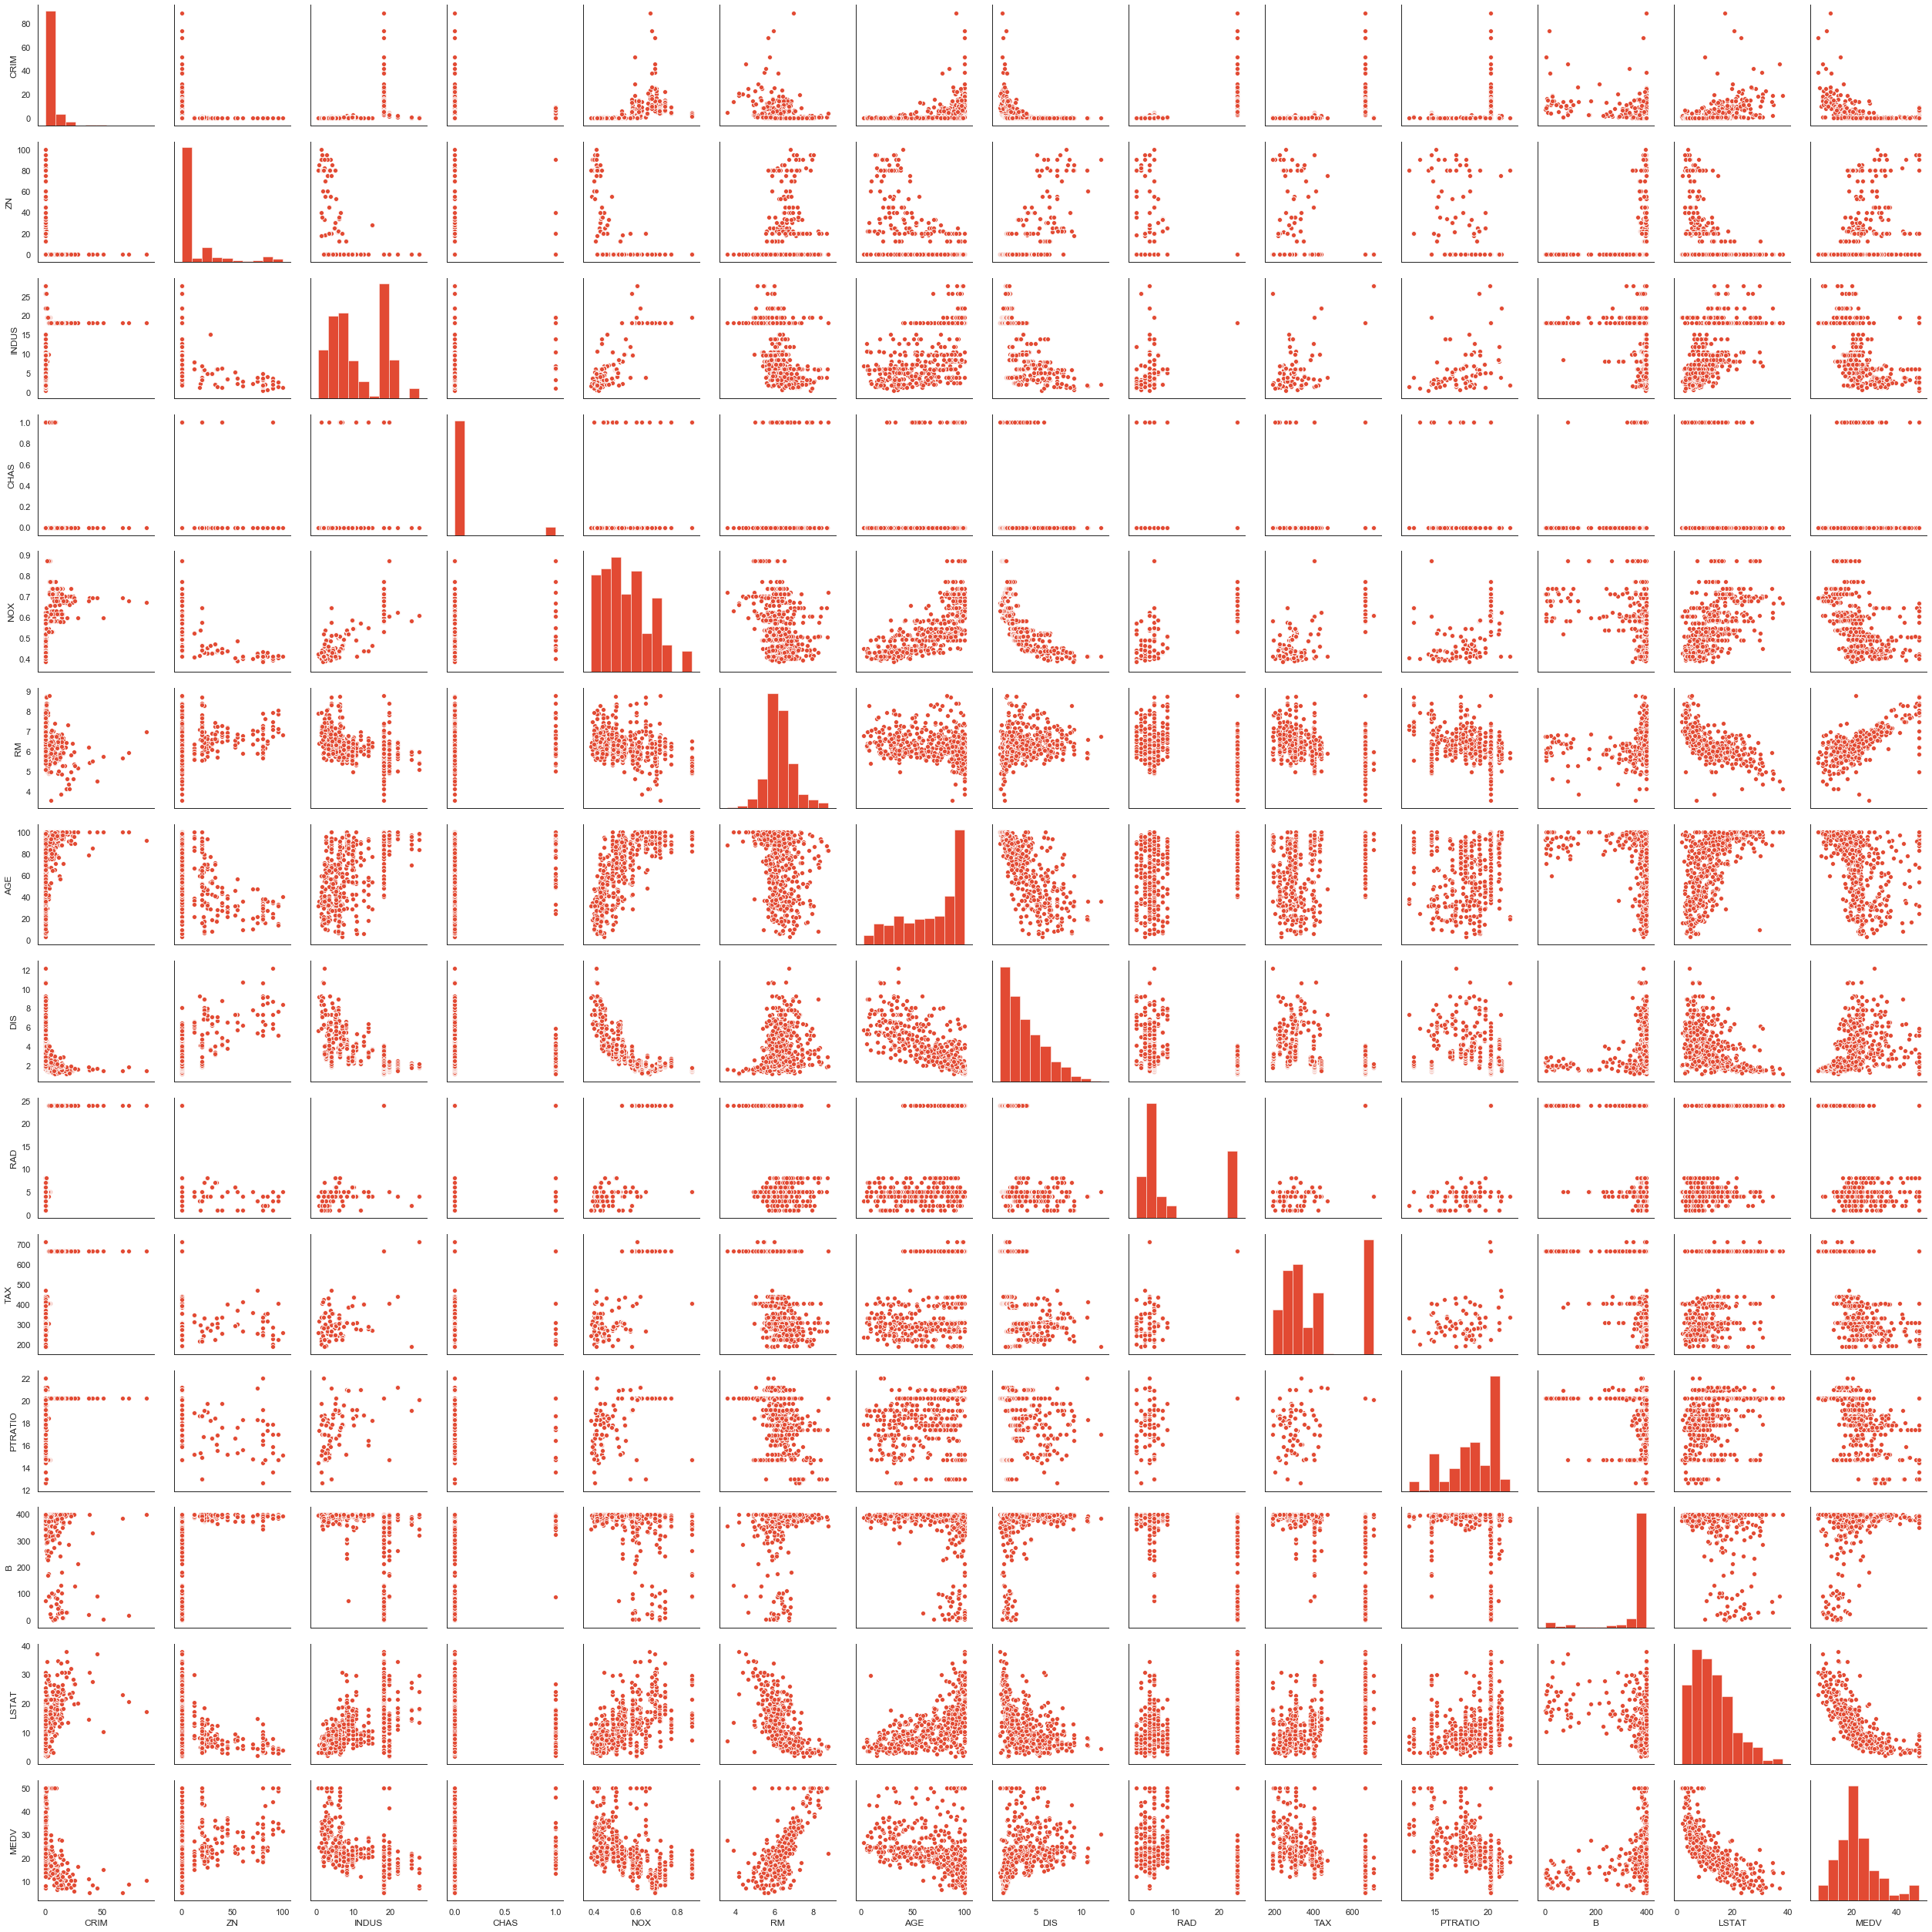

In [24]:
sns.pairplot(dataset)


## <span id="6"></span> ** 4. Regression Models **

### <span id="7"></span> ** Linear Regression **

In [121]:
from sklearn.linear_model import LinearRegression

#Creating Object
regressor_linear = LinearRegression()

#Fitting Training Data
regressor_linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train,) # cv = 10

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results_test
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6421700357648986
R2_score (train):  0.7246023742024069
R2_score (test):  0.7244493755948631
RMSE:  5.070672002739368


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


### <span id="8"></span> ** Polynomial Regression - 2nd degree ** 다항식 변환
선형회귀분석은 기본적으로 직선으로 연관성을 찾으려는 시도라고 볼 수 있는데, 주어진 독립변수들에 대해 제곱이나 변수들 간의 곱 - 다항식을 독립변수로 추가하면 다양한 곡선으로 적합이 가능.

In [123]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)  ##2차항까지 생성
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(x_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)


# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(x_test))  #Just input Data Only to Predict
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)   #Comparing , just give original data and Predicted Data


# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6473091041561567
R2_score (train):  0.9211639495507333
R2_score (test):  0.5422383122056067
RMSE:  6.535586095975033


### <span id="9"></span> ** Ridge Regression **

In [125]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=3.8, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [126]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.6539736673173936
R2_score (train):  0.9222070310710504
R2_score (test):  0.8599293333946357
RMSE:  3.615250684765099


### <span id="10"></span> ** Lasso Regression **

In [127]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=0.012, copy_X=True, fit_intercept=True,
                       max_iter=3000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [128]:
from sklearn.metrics import r2_score

#Input data to check the check cross validation
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

#predict y_test as well as r2 score from 
# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.397192750090198, tolerance: 1.700588317180617
  positive)


CV:  0.534854375335842
R2_score (train):  0.9255189840309259
R2_score (test):  0.8545814004281462
RMSE:  3.683619796333933


### <span id="11"></span> ** Support Vector Regression **
support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [129]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(x_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [130]:
# Fitting the SVR Model to the dataset

from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [131]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
#Input x scaled and y scaled 

cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results

y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(x_train))) #Feeding X-training data
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)  #r2 score by input train (original) and predicted 

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(x_test)))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.7596031884637389
R2_score (train):  0.8623519933931871
R2_score (test):  0.7486964867096372
RMSE:  4.842438339473723


### <span id="12"></span> ** Decision Tree Regression **

In [132]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [133]:
from sklearn.metrics import r2_score

#CV of x,y Train data
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = x_train, y = y_train, cv = 10)

#Predict y and compare with original Y-Train data
# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(x_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(x_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)


#This data Seems to be over Fitting because 

CV:  0.7076319632716195
R2_score (train):  1.0
R2_score (test):  0.7344438136260432
RMSE:  4.977864043420894


### <span id="13"></span> ** Random Forest Regression **
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [134]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(x_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [135]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(x_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(x_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8078134286546044
R2_score (train):  0.9797898819822721
R2_score (test):  0.8589361528562289
RMSE:  3.628045134638267


## <span id="14"></span> ** 5. Measuring the Error **

In [136]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [137]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5.070672,0.724602,0.724449,0.642170
1,Polynomial Regression (2nd),6.535586,0.921164,0.542238,0.647309
2,Ridge Regression,3.615251,0.922207,0.859929,0.653974
3,Lasso Regression,3.683620,0.925519,0.854581,0.534854
4,Support Vector Regression,4.842438,0.862352,0.748696,0.759603
5,Decision Tree Regression,4.977864,1.000000,0.734444,0.707632
6,Random Forest Regression,3.628045,0.979790,0.858936,0.807813


In [138]:
#RMSE is the square root of the variance of the residuals.lower the value highly fit the models
#Rsquare better the linear regression data is related 
#Cross validation, Some times called rotation estimation or out of sample testing

### <span id="15"></span> ** Visualizing Model Performance **

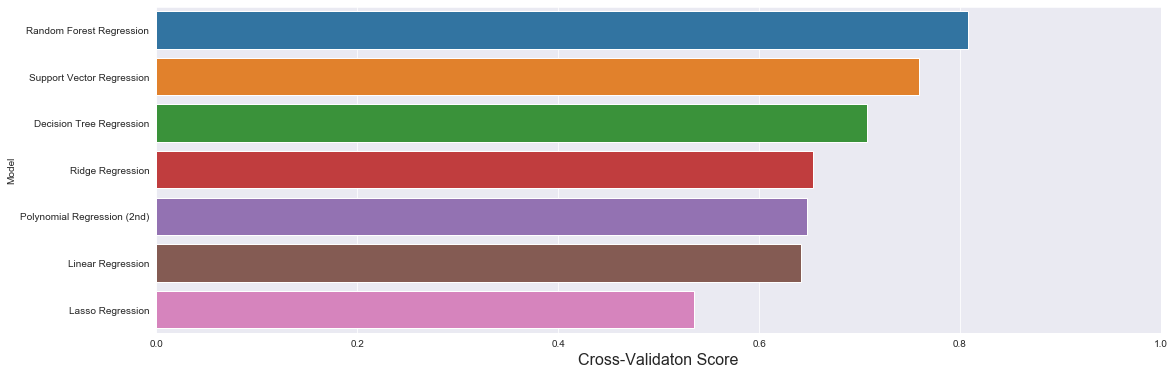

In [139]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

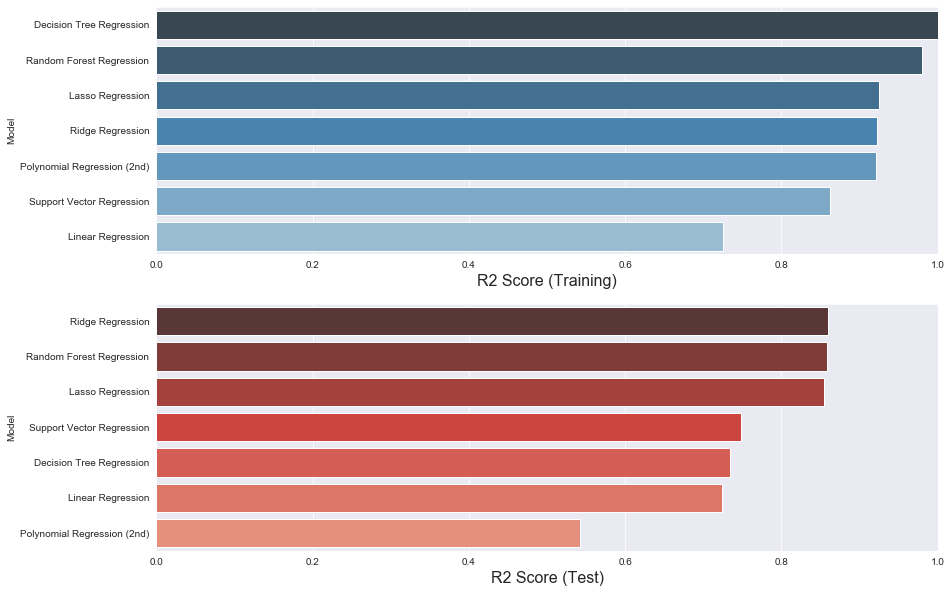

In [140]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

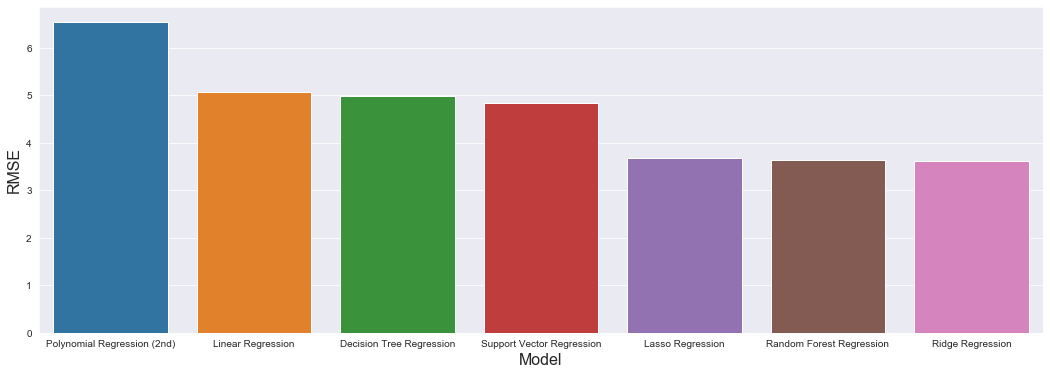

In [141]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

In this case Random Forest Regression Method is Suitable because it shows optimum Prediction in both training data and test data and RMSE is also low as compare with other 

## Bayesian Linear Regression Analysis

In [142]:
from sklearn import linear_model
blr = linear_model.BayesianRidge()
blr = blr.fit(x_train, y_train)

y_predict = blr.predict(x_test)
r2_score_blr  = r2_score(y_test, y_pred_rf_test)

print(r2_score_blr)
y_test[2] , y_predict[2]

#y_pred_linear_train = regressor_linear.predict(X_train)
#r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
#for i in range (20):
#    print(y_test[i] , y_predict[i])

0.8589361528562289


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([25.]), 26.060655333909985)

Automatically created module for IPython interactive environment


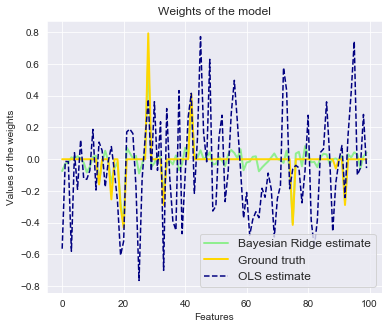

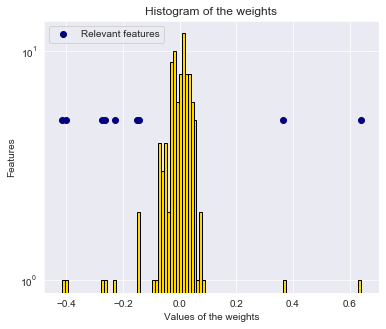

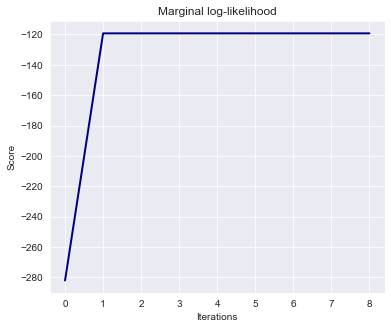

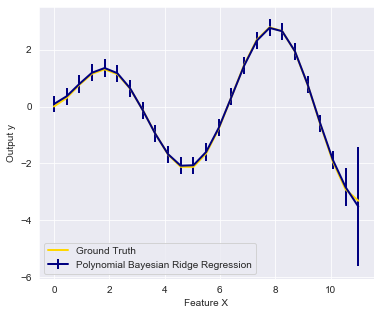

In [143]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()
#OLS is = Original Linear Regression

### sklearn.linear_model.ElasticNet

In [151]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(l1_ratio=0.7,alpha=0.1)
y_pred_enet = enet.fit(x_train , y_train).predict(x_test)

r2_score_enet = r2_score(y_test , y_pred_enet)
print(r2_score_enet)

0.7157587676266381


## Presenting all Enet , Bayesian , and General Regression in a fig

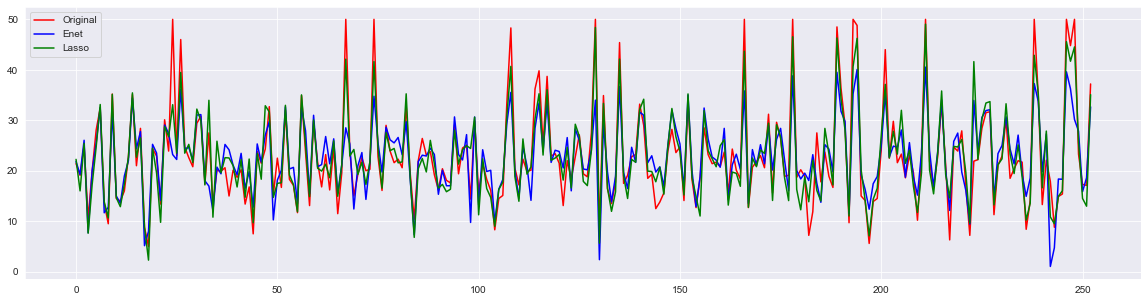

In [163]:
plt.figure(figsize=(20,5))
plt.plot(y_test,c = "r",label = "Original")
plt.plot( y_pred_enet,c="b" , label = "Enet")
plt.plot( y_pred_lasso_test,c="g" , label = "Lasso")
plt.legend()

### Scikit -learn Implementation

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(np.array(x.Duration).reshape(-1,1) , y)
print(linear_regression.intercept_ , linear_regression.coef_)

## Part 2

## Classification

In [ ]:
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
#import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score


import xgboost as xgb
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("datas/iris.csv")

In [ ]:
df.head(2)

In [ ]:
#df.describe()

In [ ]:
df.shape

In [ ]:
df["Species"].unique()

In [ ]:
df["Species"].value_counts()

## Co relation between Featutre

In [ ]:
correlation  = df.corr()
plt.figure(figsize=(10,15))
plt.figure(figsize=[10,8])
sns.heatmap(correlation,cmap='RdBu', annot= True, fmt=".3f" )
plt.show()

## Values distribution based on petal width

In [ ]:
trace0 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-setosa'],
                boxmean=True, name = 'setosa')

trace1 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-versicolor'],
                boxmean=True, name = 'versicolor')

trace2 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-virginica'],
                boxmean=True, name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

## Linear regression based on sepal

In [ ]:
sns.lmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=df)

## Linear Regression based on Petal

In [ ]:
sns.lmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=df)

### Machine Learning

In [ ]:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [ ]:
x.head()

In [ ]:
y.head()

## Labeling i. changing string to Number for Numpy Operation

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y[[1,10,20]]

In [ ]:
# As We can see 3 name of flower Iris-setosa- Iris-versicolor  Iris-virginica are converted to 0,1,2 respectively

### change data to training and testing usin sklearn train_test_split() Method

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size = 0.3 , random_state = 101)
# 101 rows will fi same fixed

## List of Algorithms

Since it is a classification problem we will be using<br>
Logistic regression<br>
Decision tree<br>
KNN<br>
SVM<br>
Naive Bayes Classification<br>
Random forest<br>
XGBoost<br>
LightGBM<br>

### Logistic Regression
##### We are using logistic regression because now we have to find Yes or No 
Means weather which kind of flower

<img src = "https://image.slidesharecdn.com/logitregression-161121215510/95/intro-to-logistic-regression-4-638.jpg?cb=1479765630">

In [ ]:
#Creating the Model (object)
lr_model = LogisticRegression()

#Fitting the Model
lr_model.fit(x_train  , y_train)

#Predict for test data
lr_predict = lr_model.predict(x_test)

#Compare the result and print 
print("Logistic Regression ", accuracy_score(lr_predict,y_test))
lr_predict,y_test

### SVM 

<img src = "https://cdn-images-1.medium.com/max/1600/1*TudH6YvvH7-h5ZyF2dJV2w.jpeg">

**“Support Vector Machine” (SVM)** is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. 

In [ ]:
#Create object\
svm_model  = SVC(kernel="linear")
svm_model.fit(x_train , y_train)
svc_predict = svm_model.predict(x_test)
print("ACCuracy of SVM ",accuracy_score(svc_predict,y_test))
(svc_predict,y_test)

### SVM Accuracy is 100 % 

### Naive Bayesian Classification

**Naive Bayes** is a simple, yet effective and commonly-used, machine learning classifier.
Naive Bayes classifiers have been especially popular for text classification, and are a traditional solution for problems such as spam detection.

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict  = nb_model.predict(x_test)

print("Naive Byaes-->", accuracy_score(nb_predict,y_test))
(nb_predict,y_test)

### Decision Tree Method
<img src = "https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png">

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification Problems. It works for categorical and continuous data variable

In [ ]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
print("Result by Decision Tree model", accuracy_score(dt_predict, y_test))
dt_predict,y_test

### Random Forest Method

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg?resize=690%2C345">

**Random Forest** is considered to be a panacea (만병 통치약 रामबाण ) of all data science problems.<br>
 when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing both **regression and classification tasks**

(https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#nine)

In [ ]:
rfc_model = RandomForestClassifier(max_depth = 3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print("Output of Random Forest Method",accuracy_score(rfc_predict, y_test))
(rfc_predict, y_test)

## Extra tree Classifieer

In [ ]:
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_predict = etc_model.predict(x_test)

print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))
etc_predict,y_test

## KNN 
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">

**K nearest neighbors** is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_precdict = knn_model.predict(x_test)

print("Result of KNN ::--",accuracy_score(knn_precdict,y_test))
knn_precdict,y_test

## XGboost
<img src="https://i.imgur.com/e7MIgXk.png">
The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

In [ ]:
xg_model = xgb.XGBClassifier()
xg_model.fit(x_train , y_train)
xg_model.score(x_test, y_test)

## Deep Learning

https://machinelearningmastery.com/what-is-deep-learning/

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
from sklearn.preprocessing import StandardScaler , LabelBinarizer
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df["Species"]

x = StandardScaler().fit_transform(x)
y= LabelBinarizer().fit_transform(y)

#Spliting train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [ ]:
x_train[1],y_train[1]

## Shallow Deep Learning

In [ ]:
shallow_model = Sequential()
shallow_model.add(Dense( 4, input_dim=4, activation = 'relu'))
shallow_model.add(Dense( units = 10, activation= 'relu'))
shallow_model.add(Dense( units = 3, activation= 'softmax'))
shallow_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
shallow_history = shallow_model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

In [ ]:
plt.plot(shallow_history.history['acc'])
plt.plot(shallow_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

### Thank You Very Much


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [28]:
from tensorflow.keras.layers import Flatten , Dense

In [30]:
from keras.utils import to_categorical

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [32]:
iris = load_iris()

In [48]:
#x = iris["data"]
x= preprocessing.scale(iris["data"]) #preprocessing will convert data between -3 to 3 z table
y = to_categorical(iris["target"])

In [49]:
#The above step is to Fast 

In [50]:
#train and test data
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size=0.3)

In [51]:
x_train[:5], y_train[:5]

(array([[-1.14301691,  0.09821729, -1.2833891 , -1.44707648],
        [-1.02184904,  0.78880759, -1.22655167, -1.05217993],
        [ 1.2803405 ,  0.32841405,  1.10378283,  1.44883158],
        [-1.74885626,  0.32841405, -1.39706395, -1.3154443 ],
        [-1.26418478,  0.78880759, -1.22655167, -1.3154443 ]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32))

### Actual ANN

In [52]:
model = Sequential()

#Layer 1
model.add(Dense(10, input_dim = 4,activation ="relu"))

#Out
model.add(Dense(3,activation="softmax"))

In [53]:
model.compile(loss = "categorical_crossentropy", optimizer="adam",metrics=["accuracy"])


In [54]:
### Fitting the Model
model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=200,batch_size=10)

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 1s 5ms/sample - loss: 1.3115 - accuracy: 0.1619 - val_loss: 1.2521 - val_accuracy: 0.1111
Epoch 2/200
105/105 [==============================] - 0s 496us/sample - loss: 1.2151 - accuracy: 0.2095 - val_loss: 1.1863 - val_accuracy: 0.1333
Epoch 3/200
105/105 [==============================] - 0s 524us/sample - loss: 1.1299 - accuracy: 0.2571 - val_loss: 1.1275 - val_accuracy: 0.2222
Epoch 4/200
105/105 [==============================] - 0s 566us/sample - loss: 1.0509 - accuracy: 0.4286 - val_loss: 1.0751 - val_accuracy: 0.4000
Epoch 5/200
105/105 [==============================] - 0s 489us/sample - loss: 0.9853 - accuracy: 0.5810 - val_loss: 1.0289 - val_accuracy: 0.4222
Epoch 6/200
105/105 [==============================] - 0s 514us/sample - loss: 0.9269 - accuracy: 0.6000 - val_loss: 0.9885 - val_accuracy: 0.4444
Epoch 7/200
105/105 [==============================] - 0s 544us/sample - lo

105/105 [==============================] - 0s 533us/sample - loss: 0.3481 - accuracy: 0.8381 - val_loss: 0.4447 - val_accuracy: 0.8444
Epoch 57/200
105/105 [==============================] - 0s 552us/sample - loss: 0.3445 - accuracy: 0.8476 - val_loss: 0.4404 - val_accuracy: 0.8444
Epoch 58/200
105/105 [==============================] - 0s 540us/sample - loss: 0.3419 - accuracy: 0.8476 - val_loss: 0.4357 - val_accuracy: 0.8444
Epoch 59/200
105/105 [==============================] - 0s 484us/sample - loss: 0.3387 - accuracy: 0.8476 - val_loss: 0.4313 - val_accuracy: 0.8667
Epoch 60/200
105/105 [==============================] - 0s 519us/sample - loss: 0.3353 - accuracy: 0.8476 - val_loss: 0.4271 - val_accuracy: 0.8667
Epoch 61/200
105/105 [==============================] - 0s 490us/sample - loss: 0.3326 - accuracy: 0.8476 - val_loss: 0.4233 - val_accuracy: 0.8667
Epoch 62/200
105/105 [==============================] - 0s 499us/sample - loss: 0.3292 - accuracy: 0.8476 - val_loss: 0.4188 

105/105 [==============================] - 0s 651us/sample - loss: 0.2207 - accuracy: 0.9143 - val_loss: 0.2729 - val_accuracy: 0.8889
Epoch 112/200
105/105 [==============================] - 0s 706us/sample - loss: 0.2192 - accuracy: 0.9143 - val_loss: 0.2708 - val_accuracy: 0.8889
Epoch 113/200
105/105 [==============================] - 0s 702us/sample - loss: 0.2174 - accuracy: 0.9143 - val_loss: 0.2689 - val_accuracy: 0.9111
Epoch 114/200
105/105 [==============================] - 0s 666us/sample - loss: 0.2156 - accuracy: 0.9143 - val_loss: 0.2663 - val_accuracy: 0.9111
Epoch 115/200
105/105 [==============================] - 0s 726us/sample - loss: 0.2141 - accuracy: 0.9143 - val_loss: 0.2644 - val_accuracy: 0.9111
Epoch 116/200
105/105 [==============================] - 0s 707us/sample - loss: 0.2124 - accuracy: 0.9143 - val_loss: 0.2618 - val_accuracy: 0.9111
Epoch 117/200
105/105 [==============================] - 0s 621us/sample - loss: 0.2106 - accuracy: 0.9143 - val_loss: 0

Epoch 166/200
105/105 [==============================] - 0s 511us/sample - loss: 0.1182 - accuracy: 0.9524 - val_loss: 0.1513 - val_accuracy: 0.9556
Epoch 167/200
105/105 [==============================] - 0s 480us/sample - loss: 0.1170 - accuracy: 0.9619 - val_loss: 0.1500 - val_accuracy: 0.9556
Epoch 168/200
105/105 [==============================] - 0s 510us/sample - loss: 0.1160 - accuracy: 0.9619 - val_loss: 0.1483 - val_accuracy: 0.9556
Epoch 169/200
105/105 [==============================] - 0s 498us/sample - loss: 0.1150 - accuracy: 0.9619 - val_loss: 0.1474 - val_accuracy: 0.9556
Epoch 170/200
105/105 [==============================] - 0s 492us/sample - loss: 0.1138 - accuracy: 0.9619 - val_loss: 0.1457 - val_accuracy: 0.9556
Epoch 171/200
105/105 [==============================] - 0s 493us/sample - loss: 0.1130 - accuracy: 0.9619 - val_loss: 0.1444 - val_accuracy: 0.9556
Epoch 172/200
105/105 [==============================] - 0s 494us/sample - loss: 0.1120 - accuracy: 0.9619